From the Subjective Value formula, we can calculate new values:
# 
$$
SV = \frac{V}{1 + k\cdot d}
$$
$$
V = SV \cdot (1+ K \cdot d)
$$

Where V is the amount to be gained, d is the delay, SV the subjective value and K the kappa parameter of the hyperbolic discount

In [5]:
import csv
import os
#participant_code = input ("")
path = '/Volumes/UCDN/datasets/SDM/'
participant_code = '23_SDM_0004_N'
print('the Participant Code is ' + participant_code)
#MAC path to the File share
participant_split_dir = os.path.join(path,'split') 
participant_trials = os.path.join(participant_split_dir,'{}/cdd/{}_cdd.csv').format(participant_code,participant_code) #This is the psychopy output CSV.We will use it to retrieve the probabilities and image files. 

#Path to the utility model data
utility_dir = os.path.join(path,'utility')
utility_analysis = os.path.join(utility_dir,'split_CDD_analysis.csv')
#parameters = pd.read_csv(utility_analysis)
amb_options = [0.24, 0.5, 0.74]

print('loading fn: {}'.format(participant_trials))
print('loading fn: {}'.format(utility_analysis))

#Extracting the parameters from participants

#Model parameters
kappa_value = None

# Open the CSV file and read its contents into csv_data
with open(utility_analysis, newline='') as file:
    reader = csv.DictReader(file)
    # Iterate through each row in the CSV
    for row in reader:
        if row['subject'] == participant_code:
            kappa_value = float(row['kappa'])
            break  # Exit the loop once the participant is found

kappa_value

the Participant Code is 23_SDM_0004_N
loading fn: /Volumes/UCDN/datasets/SDM/split/23_SDM_0004_N/cdd/23_SDM_0004_N_cdd.csv
loading fn: /Volumes/UCDN/datasets/SDM/utility/split_CDD_analysis.csv


0.012000836788582943

In [15]:
import csv

# Initialize an empty dictionary to store the data
trials_dict = {
    'cdd_immed_amt': [],
    'cdd_immed_wait': [],
    'cdd_delay_amt': [],
    'cdd_delay_wait': []
}

# Read the CSV file
with open(participant_trials, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        # Check if the value is not empty before converting to an integer
        if row['cdd_immed_amt']:
            trials_dict['cdd_immed_amt'].append(int(row['cdd_immed_amt']))
        if row['cdd_immed_wait']:
            trials_dict['cdd_immed_wait'].append(int(row['cdd_immed_wait']))
        if row['cdd_delay_amt']:
            trials_dict['cdd_delay_amt'].append(int(row['cdd_delay_amt']))
        if row['cdd_delay_wait']:
            trials_dict['cdd_delay_wait'].append(int(row['cdd_delay_wait']))

# Print the resulting dictionary
immed_options = list(set(trials_dict['cdd_immed_amt']))
ammt_del_options = list(set(trials_dict['cdd_delay_amt']))
time_options = list(set(trials_dict['cdd_delay_wait']))

[4,
 5,
 6,
 9,
 10,
 11,
 149,
 150,
 151,
 152,
 29,
 30,
 31,
 59,
 60,
 61,
 64,
 89,
 90,
 91]

In [ ]:
'''
#First, let's read the ADO output for gains and losses and make it DataFrames
patient_code = 'NIH_ADO_sample' #This is to keep the CSV in the same directories as the patient's data
ado_out_gain = '/Volumes/UCDN/datasets/ICR/ado/sample_output_gain.csv'
ado_out_loss = '/Volumes/UCDN/datasets/ICR/ado/sample_output_loss.csv'
ado_out_gain_df = pd.read_csv(ado_out_gain, index_col=None)
ado_out_loss_df = pd.read_csv(ado_out_loss, index_col=None)

#Now, we extract the last row of the ADO. Those are going to be our parameters
ado_gain_last_row = ado_out_gain_df.iloc[[-1]] 
ado_loss_last_row = ado_out_loss_df.iloc[[-1]] 

#Parameters for the gains
alpha_pos, beta_pos = ado_gain_last_row[['mean_alpha','mean_beta']].values[0]

#Parameters for the losses
alpha_neg, beta_neg = ado_loss_last_row[['mean_alpha','mean_beta']].values[0]
'''

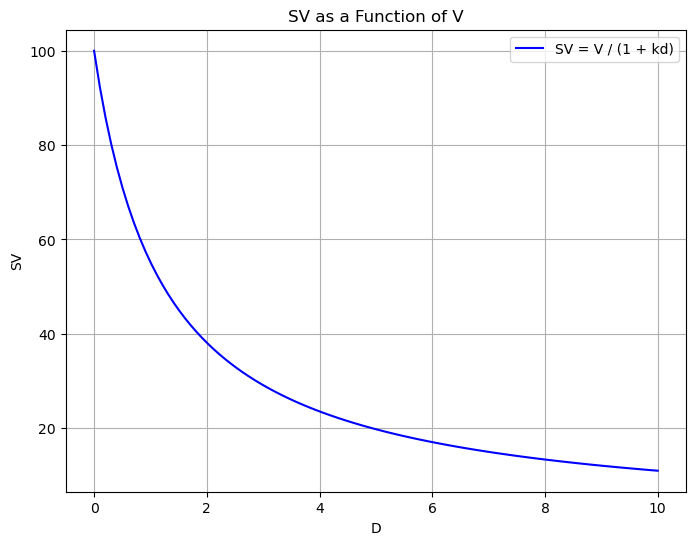

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the values of k and d
k = 0.812000836788582943
d = np.linspace(0, 10, 100)  # Adjust the range and number of points as needed


# Create an array of V values
V = 100  # Adjust the range and number of points as needed

# Calculate SV for each V value using the equation
SV = V / (1 + k * d)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(d, SV, label='SV = V / (1 + kd)', color='b', linestyle='-')
plt.xlabel('D')
plt.ylabel('SV')
plt.title('SV as a Function of V')
plt.grid(True)
plt.legend()
plt.show()
